In [ ]:
!pip install -q imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/5-online_course_engagement_data.csv')

In [ ]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()
le = LabelEncoder()                                                #2154901040
df_encoded['CourseCategory'] = le.fit_transform(df_encoded['CourseCategory'])

In [ ]:
X = df_encoded.drop(['UserID', 'CourseCompletion'], axis=1)
y = df_encoded['CourseCompletion']
print(y)

0       0
1       0
2       1
3       1
4       0
       ..
8995    0
8996    0
8997    0
8998    1
8999    0
Name: CourseCompletion, Length: 9000, dtype: int64


In [ ]:
print(X)

      CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0                  2          29.979719                     17   
1                  0          27.802640                      1   
2                  0          86.820485                     14   
3                  4          35.038427                     17   
4                  3          92.490647                     16   
...              ...                ...                    ...   
8995               2          37.445225                     14   
8996               4          48.631443                      7   
8997               2          38.212512                      3   
8998               2          70.048665                     13   
8999               2          93.589781                      7   

      NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  
0                        3   50.365656       20.860773           1  
1                        5   62.615970       65.632415           1  


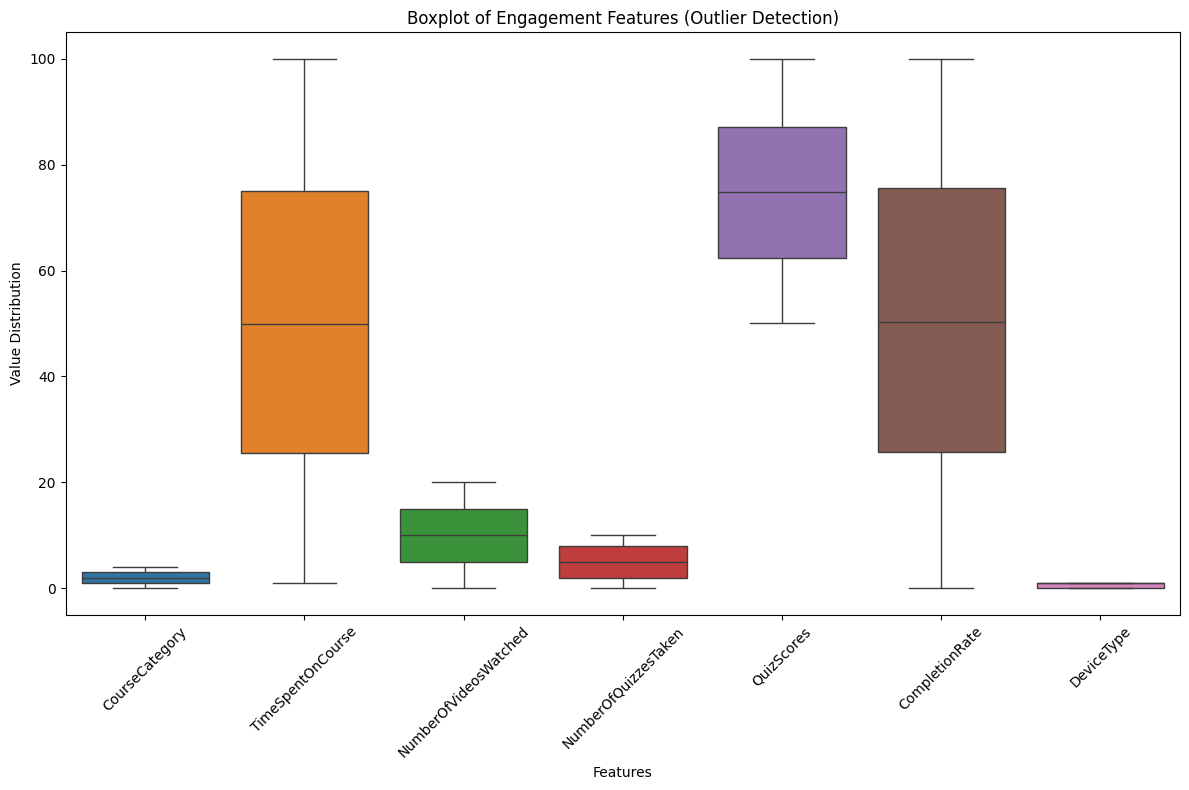

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=X)
plt.title('Boxplot of Engagement Features (Outlier Detection)') #2154901040
plt.xlabel('Features')
plt.ylabel('Value Distribution')
plt.xticks(rotation=45)
plt.tight_layout()

In [ ]:
# Identify outliers using IQR
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

outliers = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).sum()          #2154901040
print("Number of outliers in each feature:")
print(outliers)


Number of outliers in each feature:
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)              #2154901040


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)                  #2154901040
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight="balanced", random_state=42)        #2154901040
model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,                         #2154901040
    f1_score, confusion_matrix, classification_report
)

In [ ]:
y_pred = model.predict(X_test_scaled)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))                               #2154901040
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9133333333333333
Precision: 0.8988919667590027
Recall: 0.8866120218579235
F1 Score: 0.8927097661623109

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93      1068
           1       0.90      0.89      0.89       732

    accuracy                           0.91      1800
   macro avg       0.91      0.91      0.91      1800
weighted avg       0.91      0.91      0.91      1800



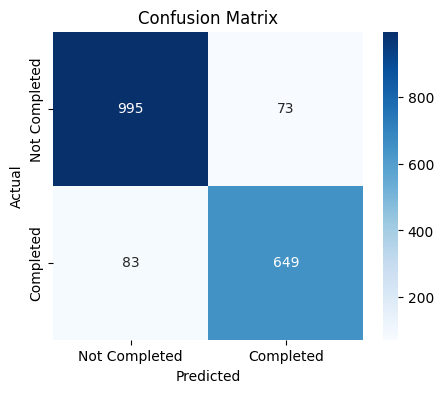

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Completed", "Completed"],
            yticklabels=["Not Completed", "Completed"])                         #2154901040
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X, y, cv=5)                                 #2154901040
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.92111111 0.91277778 0.92833333 0.92       0.92666667]
Mean CV Accuracy: 0.9217777777777778
